# Covariance Estimation of Multivariate Guassian Samples

This code is based on the paper "Covariance Estimation Using Conjugate Gradient For 3D Classification in Cryo-EM"

In [67]:
%pylab inline
import scipy
import os

Populating the interactive namespace from numpy and matplotlib


/Users/bceng2/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['indices']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Generate the L operator in (16)

 [a  b  ][sig00 sig01][a b]
 
 [c  d  ][sig10 sig11][c d]
 
 
 [sig00 sig01 sig10 sig11].T

In [68]:
#Generates linear operator L
# mat1 is  a p x p matrix
def genL (mat1):
    dims = mat1.shape;
    rows = dims[0];
    cols = dims[1];
    
    LL = np.zeros([rows**2, rows**2]);
    cnt= 0;
    for i in range(rows):
        for j in range(cols):
            row_idx = i*rows+j
            
            roi = mat1[i,:];
            coi = mat1[:,j];
            cnt=0;
            print roi
            print coi
            for jj in range(cols):
                for ii in range(rows):
                    LL[row_idx,cnt] = roi[ii]*coi[jj];
                    cnt+=1;
    return LL;
                

In [69]:
# B_n equation (17)  of paper

def calc_Bn(projI,meas,mu,dim):
    
    obs_cov = np.zeros([dim,dim]);
    num_meas = len(meas);
    
    for i in range(dim):
        Is = projI[i,:].reshape([dim,1]);
        Ms = meas[i]
        A = Ms.T
        B = Is-np.matmul(Ms,mu);
        C = (Is-np.matmul(Ms,mu)).T;
        D = Ms;
        T1 = np.matmul(A,B);
        
        T2 = np.matmul(T1,C);
       
        Mi = np.matmul(T2,D);
        obs_cov = obs_cov+Mi;
    obs_cov = obs_cov/num_meas;
    return obs_cov;
    
    


In [109]:
DIM = 30;
X = np.random.multivariate_normal(zeros([DIM,]),np.eye(DIM),100000) #Draw 10000 

In [110]:
M =[];
indices = np.arange(0,DIM,1)
for i in range(100000):
    Ms = np.eye(DIM);
    val_pick = np.random.choice(indices,[1,],replace=True);
    Ms[val_pick,val_pick]=0;
    M.append(Ms)

In [111]:
MM = np.zeros([DIM,DIM]);
for j in range(100000):
    MM= MM+np.matmul(M[j].T,M[j]);
    
MM = MM/100000

In [112]:
MM

array([[ 0.96581,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
         0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
         0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
         0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
         0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.96629,  0.     ,  0.     ,  0.     ,  0.     ,
         0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
         0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
         0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
         0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.     ,  0.96695,  0.     ,  0.     ,  0.     ,
         0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
         0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
         0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
         0.     ,  0.     ,  0.     ,  0.     

In [113]:
Is = np.zeros([100000,30]);
for i in range(100000):
    
    Proj = (np.matmul(M[i],X[i,:].reshape([30,1]))).reshape([30])
    Is[i,:] = Proj;

In [115]:
#Averaging imaging operators
avg_op = np.zeros([30,30])
for i in range(100000):
    avg_op= avg_op+np.matmul(M[i].T,M[i]);

avg_op = avg_op/100000;
    

In [116]:
avg_I = nanmean(Is,axis=0)

In [117]:
mu_est = np.linalg.solve(avg_op,avg_I)

In [118]:
mu_est

array([ -8.92583278e-03,   1.24463735e-03,  -5.93147023e-03,
         6.93435728e-04,   1.88590122e-04,  -9.36035564e-03,
        -1.77089365e-03,   1.98365991e-03,   4.81168404e-03,
        -3.84879386e-04,  -1.54636369e-03,  -1.36600452e-03,
         1.47873998e-03,  -1.14106562e-03,   1.36724483e-03,
         3.18982469e-03,   1.66432046e-03,   3.80864960e-04,
        -3.32409499e-04,   5.75173269e-04,  -2.98360459e-04,
        -2.81689434e-03,   1.07263383e-03,  -3.49413446e-03,
        -3.01863432e-05,  -2.39353902e-03,  -1.17496447e-03,
         2.49208063e-03,   5.58638036e-04,  -3.67496650e-03])

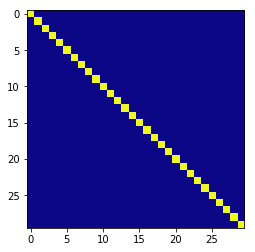

In [119]:
imshow(avg_op,cmap='plasma')


In [120]:
XX = calc_Bn(Is,M,mu_est,DIM)

In [121]:
Bn_p= XX.ravel()

In [122]:
avg_op

array([[ 0.96581,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
         0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
         0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
         0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
         0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.96629,  0.     ,  0.     ,  0.     ,  0.     ,
         0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
         0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
         0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
         0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.     ,  0.96695,  0.     ,  0.     ,  0.     ,
         0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
         0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
         0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
         0.     ,  0.     ,  0.     ,  0.     

In [123]:
Ln = genL(MM)

[ 0.96581  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.     ]
[ 0.96581  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.     ]
[ 0.96581  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.     ]
[ 0.       0.96629  0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0

In [124]:
Ln.shape

(900, 900)

In [125]:
Bn_p.shape

(900,)

In [126]:
Ln

array([[ 0.93278896,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.93661748]])

In [127]:
import scipy.sparse as spartacus

In [128]:
sA = spartacus.csr_matrix(Ln)

In [129]:
x = scipy.sparse.linalg.cg(sA,Bn_p)

AttributeError: 'module' object has no attribute 'linalg'

In [130]:
x = np.linalg.lstsq(Ln,Bn_p)

In [131]:
cov_est = x[0].reshape([30,30])

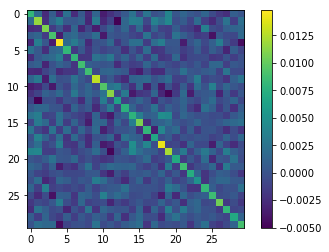

In [133]:
imshow(cov_est)
colorbar()

In [134]:
np.histogram(x[0])

(array([ 32, 198, 386, 208,  46,   3,  15,   4,   5,   3]),
 array([-0.00501492, -0.0030369 , -0.00105888,  0.00091913,  0.00289715,
         0.00487517,  0.00685319,  0.0088312 ,  0.01080922,  0.01278724,
         0.01476526]))

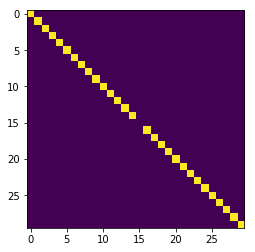

In [136]:
imshow(Ms)

In [138]:
A = np.eye(2)

In [139]:
genL(A)

[ 1.  0.]
[ 1.  0.]
[ 1.  0.]
[ 0.  1.]
[ 0.  1.]
[ 1.  0.]
[ 0.  1.]
[ 0.  1.]


array([[ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.]])